# Exploratory Data Analysis

In this notebook we'll do some exploratory data analysis over our dataset. However, since we don't have our features created yet, we cannot do much at this point. In addition, when we create them, we won't be able to extract many insights because of the nature of text-based features. For this reason, only a shallow analysis will be done at this point.

For the plots we have used `seaborn` and `altair`. `altair` is a package which allows us to plot graphics with a simple grammar as we would do in ggplot2 or Tableau. It also provides easy-to-make interactive plots. For further information please visit the project site: https://altair-viz.github.io/.

To install it, please type this command in the shell:

`! conda install -c conda-forge altair vega_datasets notebook vega`

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
alt.renderers.enable("notebook")

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

Loading the dataset:

In [19]:
df_path = "C:/Users/Sai Kaushik/Desktop/Feature Engineering/ICE 1/Latest-News-Classifier-master/0. Latest News Classifier/01. Dataset Creation/"
df_path2 = df_path + 'News_dataset3.csv'
df = pd.read_csv(df_path2, sep=';')

In [20]:
df.head()

,File_Name,Content,Category,Complete_Filename
0,001.txt,Why the feds are investigating Teslaâ€™s Autop...,Tesla,001.txt-Tesla
1,002.txt,Tesla Wants To Launch Full Self-Driving Public...,Tesla,002.txt-Tesla
2,003.txt,How Good Is Tesla Full Self-Driving (Beta) Rig...,Tesla,003.txt-Tesla
3,004.txt,Tesla Must Send Autopilot Data to Feds by Octo...,Tesla,004.txt-Tesla
4,005.txt,Survey Reveals Tesla's Full Self-Driving Take ...,Tesla,005.txt-Tesla


### Number of articles in each category

In [21]:
bars = alt.Chart(df).mark_bar(size=50).encode(
    x=alt.X("Category"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of articles')),
    tooltip=[alt.Tooltip('count()', title='Number of articles'), 'Category'],
    color='Category'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Number of articles in each category",
)

### % of articles in each category

In [22]:
df['id'] = 1
df2 = pd.DataFrame(df.groupby('Category').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('Category'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Articles')),
    color='Category'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of articles in each category",
)

The classes are approximately balanced. We'll first try to train the models without oversampling/undersampling. If we see some bias in the model, we'll use these techniques.

### News length by category

Definition of news length field. Although there are special characters in the text (``\r, \n``), it will be useful as an approximation.

In [23]:
df['News_length'] = df['Content'].str.len()

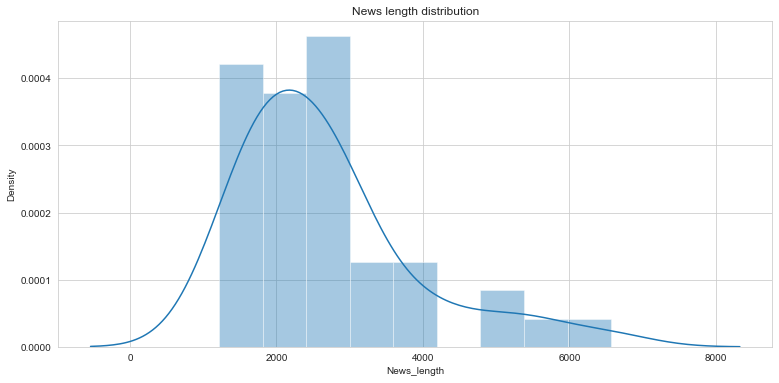

In [24]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['News_length']).set_title('News length distribution');

In [25]:
df['News_length'].describe()

count      40.000000
mean     2668.300000
std      1225.550576
min      1220.000000
25%      1865.250000
50%      2431.500000
75%      2981.750000
max      6568.000000
Name: News_length, dtype: float64

Let's remove from the 95% percentile onwards to better appreciate the histogram:

In [26]:
quantile_95 = df['News_length'].quantile(0.95)
df_95 = df[df['News_length'] < quantile_95]

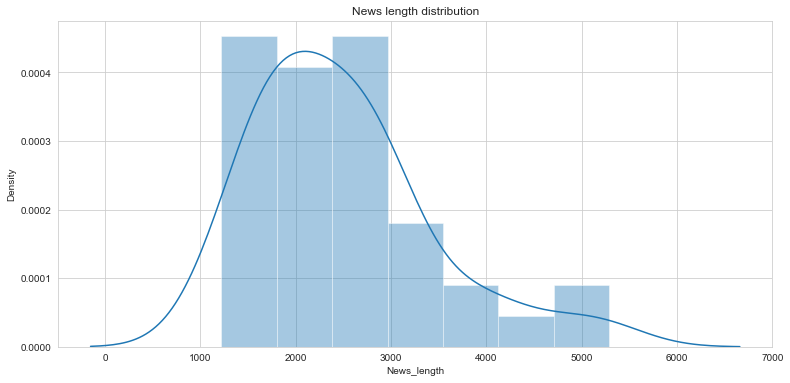

In [27]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['News_length']).set_title('News length distribution');

We can get the number of news articles with more than 10,000 characters:

In [28]:
df_more10k = df[df['News_length'] > 2000]
len(df_more10k)

25

Let's see one:

In [29]:
df_more10k['Content'].iloc[0]

'Why the feds are investigating Teslaâ€™s Autopilot and what that means for the future of self-driving cars\r\nItâ€™s hard to miss the flashing lights of fire engines, ambulances and police cars ahead of you as youâ€™re driving down the road. But in at least 11 cases in the past three and a half years, Teslaâ€™s Autopilot advanced driver-assistance system did just that. This led to 11 accidents in which Teslas crashed into emergency vehicles or other vehicles at those scenes, resulting in 17 injuries and one death.\r\n\r\nThe National Highway Transportation Safety Administration has launched an investigation into Teslaâ€™s Autopilot system in response to the crashes. The incidents took place between January 2018 and July 2021 in Arizona, California, Connecticut, Florida, Indiana, Massachusetts, Michigan, North Carolina and Texas. The probe covers 765,000 Tesla cars â€“ thatâ€™s virtually every car the company has made in the last seven years. Itâ€™s also not the first time the federal 

It's just a large news article.

Let's now plot a boxplot:

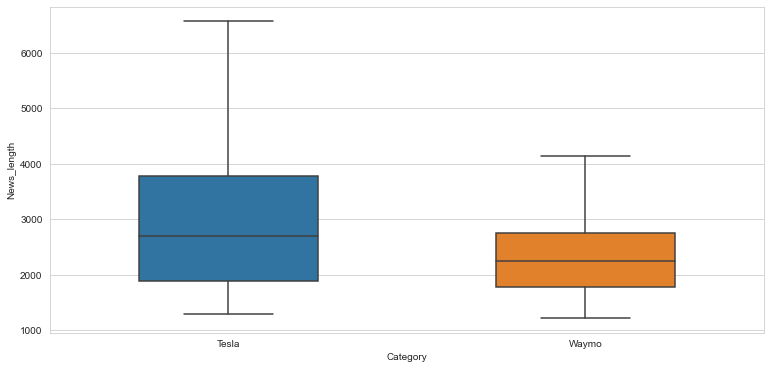

In [30]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='Category', y='News_length', width=.5);

Now, let's remove the larger documents for better comprehension:

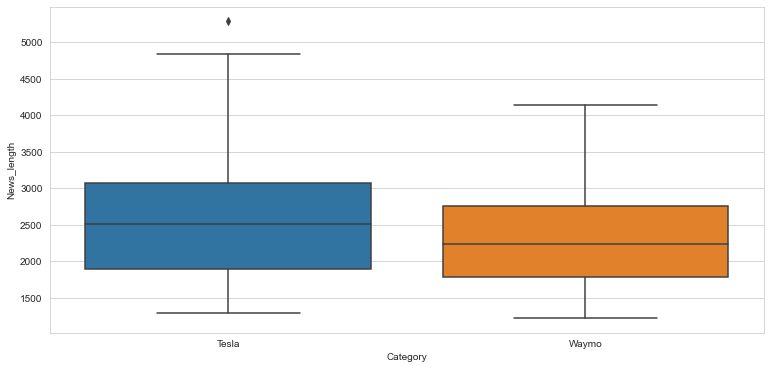

In [31]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='Category', y='News_length');

We can see that, although the length distribution is different for every category, the difference is not too big. If we had way too different lengths between categories we would have a problem since the feature creation process may take into account counts of words. However, when creating the features with TF-IDF scoring, we will normalize the features just to avoid this.

At this point, we cannot do further Exploratory Data Analysis. We'll turn onto the **Feature Engineering** section.

We'll save the dataset:

In [32]:
with open('News_dataset.pickle', 'wb') as output:
    pickle.dump(df, output)